# Imports

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import umap

2025-12-13 05:34:31.517091: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-13 05:34:31.534050: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-13 05:34:31.534070: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-13 05:34:31.548150: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-13 05:34:32.174796: W tensorflow/compiler/tf

# Params

In [2]:
save_path = '/data/scDisentangle figures/Kang/UMAPs'
covariate_name = 'cell_type'
condition_name = 'condition'

# Read adata

In [3]:
adata = sc.read_h5ad('adata_structured.h5ad')

/home/SE/miniconda3/envs/trials/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


# Fit UMAP on last level and infer on other levels

In [4]:
# UMAP on last level
umap_model = umap.UMAP(n_components=2, random_state=1)

umap_model.fit(adata.obsm['map_latent_summed'][adata.obs['level'] == 15])

/home/SE/miniconda3/envs/trials/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/SE/miniconda3/envs/trials/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


,n_neighbors,15
,n_components,2
,metric,'euclidean'
,metric_kwds,None
,output_metric,'euclidean'
,output_metric_kwds,None
,n_epochs,None
,learning_rate,1.0
,init,'spectral'
,min_dist,0.1
,spread,1.0


In [5]:
# Infer on all other levels
X_umap = umap_model.transform(adata.obsm['map_latent_summed'])

# Store the result in adata_cat
adata.obsm['X_umap_fit'] = X_umap

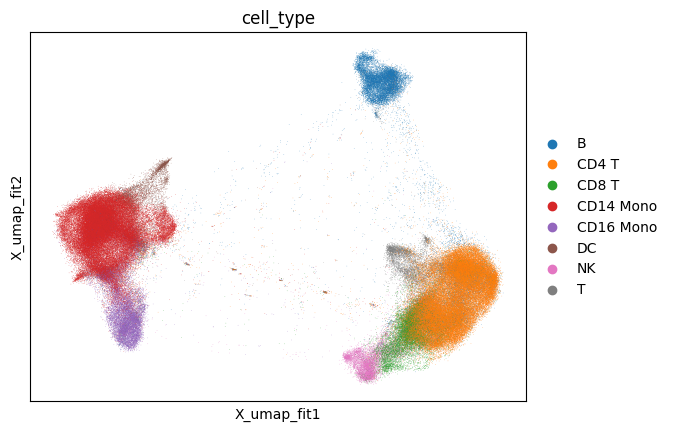

In [6]:
sc.pl.embedding(
    adata,
    basis='X_umap_fit',
    color='cell_type',
    show=False
)

plt.savefig(f'{save_path}/UMAP_cat_cell_type.png', dpi=600)
plt.savefig(f'{save_path}/UMAP_cat_cell_type.pdf', dpi=600)

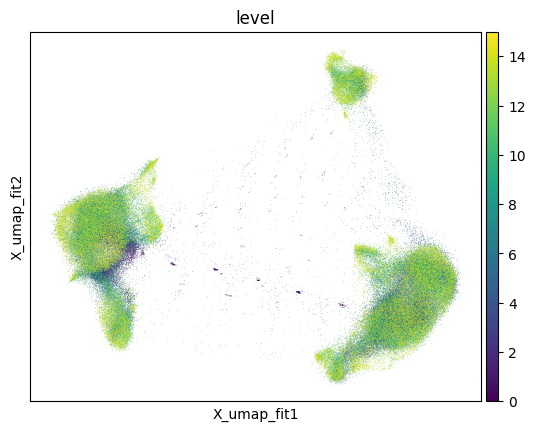

In [7]:
sc.pl.embedding(
    adata,
    basis='X_umap_fit',
    color='level',
    show=False
)

plt.savefig(f'{save_path}/UMAP_cat_level.png', dpi=600)
plt.savefig(f'{save_path}/UMAP_cat_level.pdf', dpi=600)

# Plot preserved covariate across latent levels

In [8]:
import os

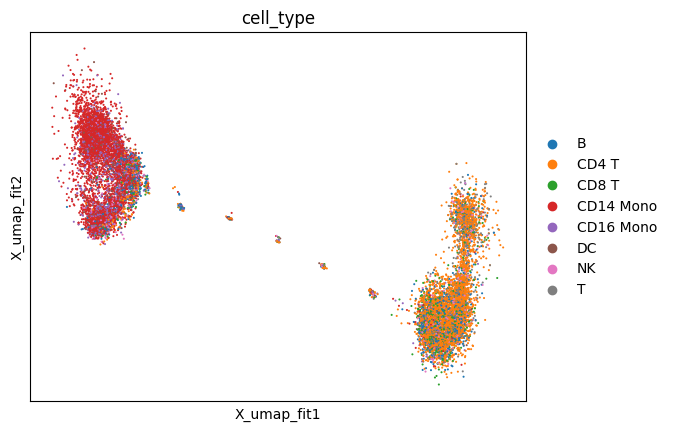

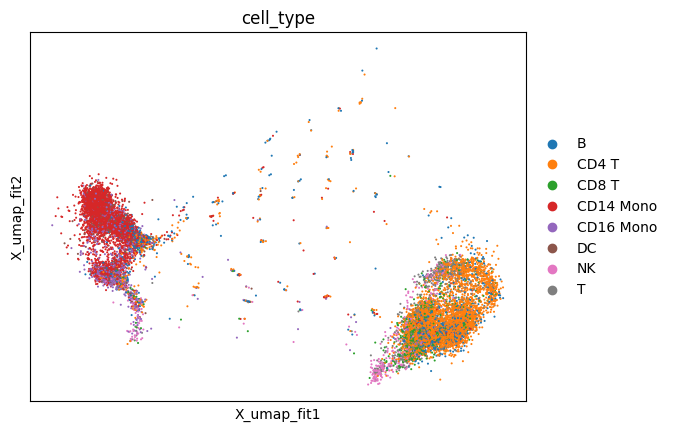

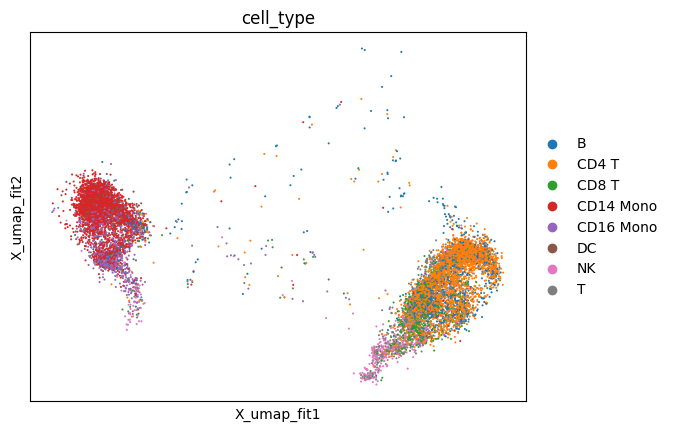

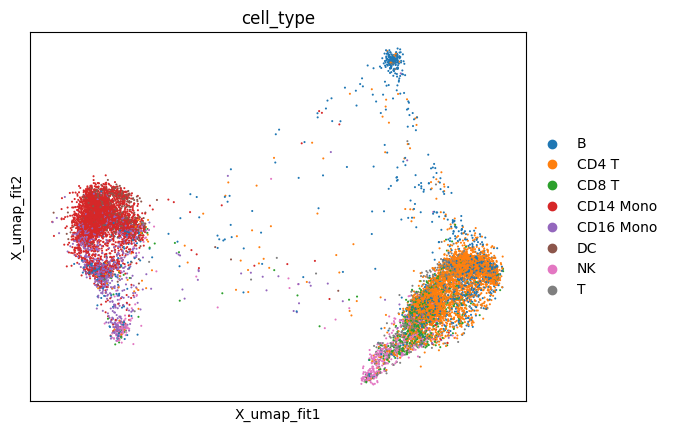

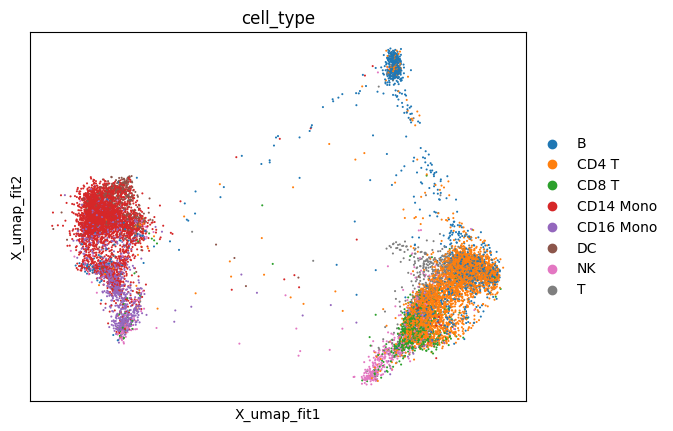

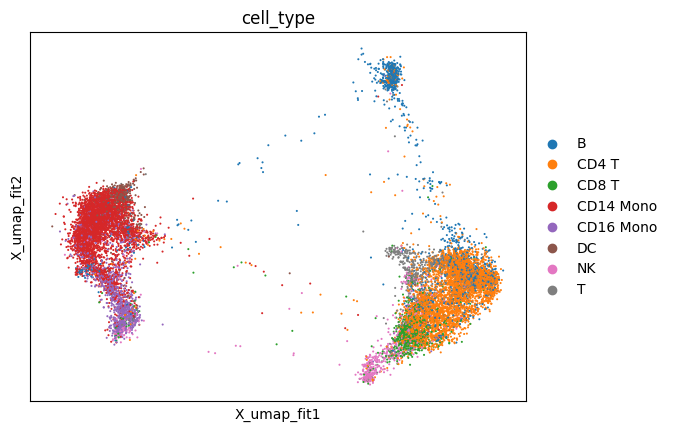

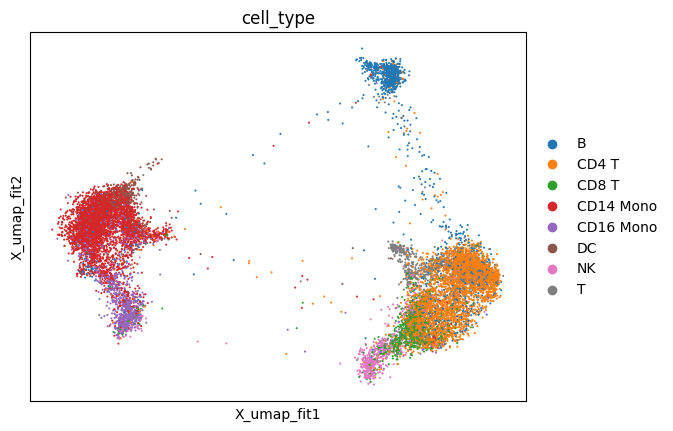

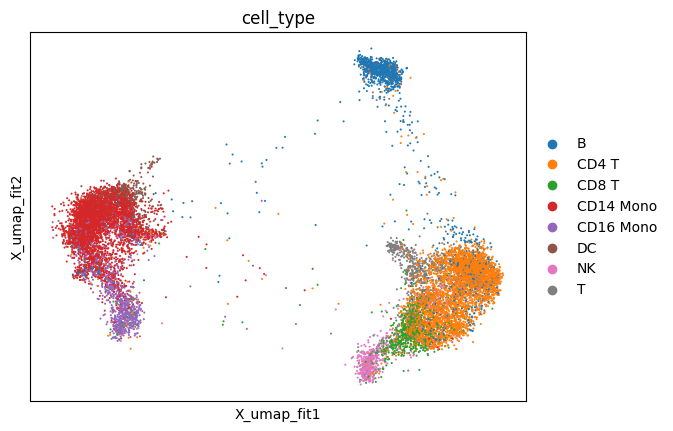

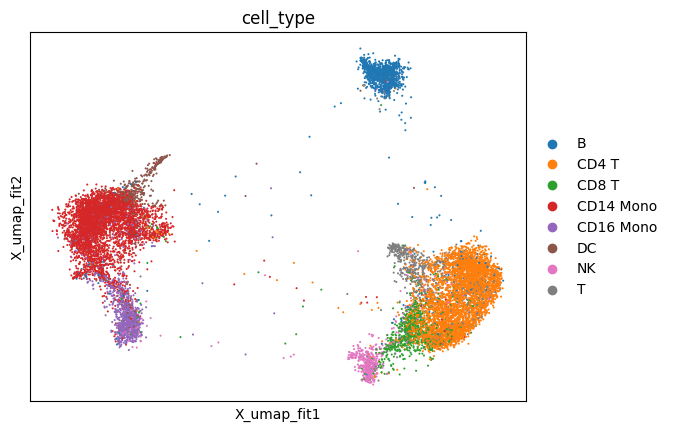

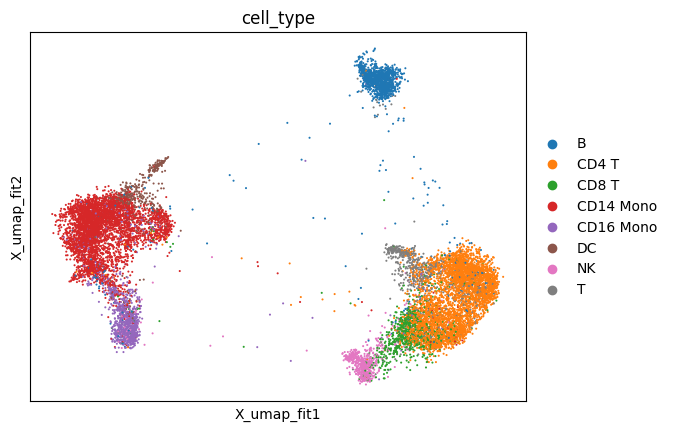

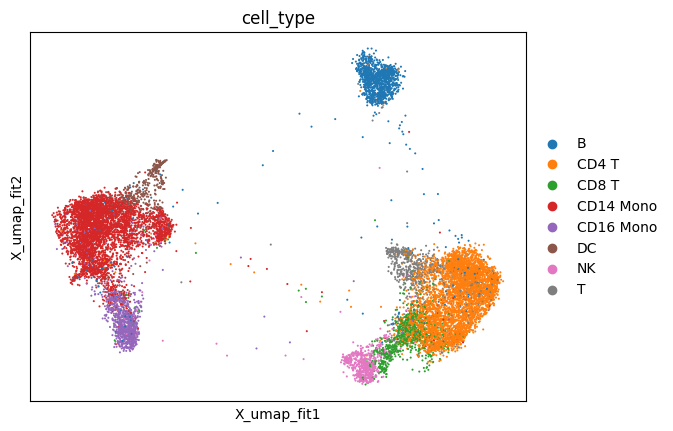

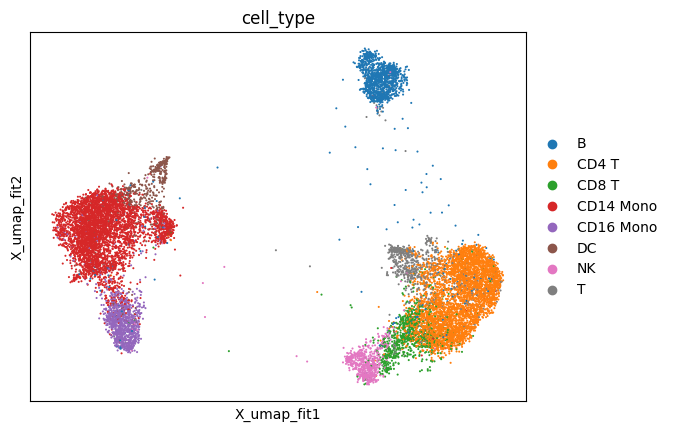

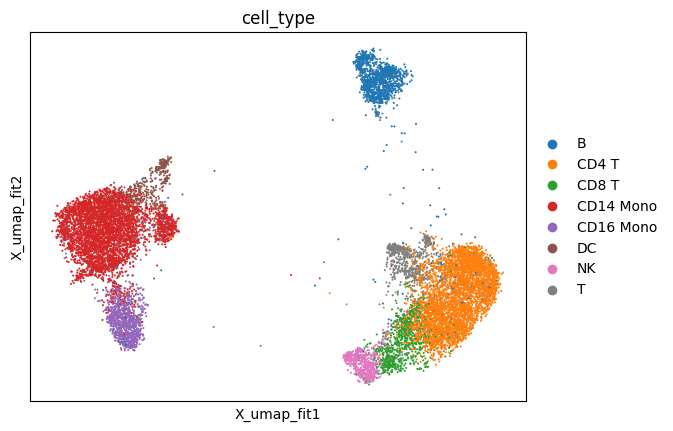

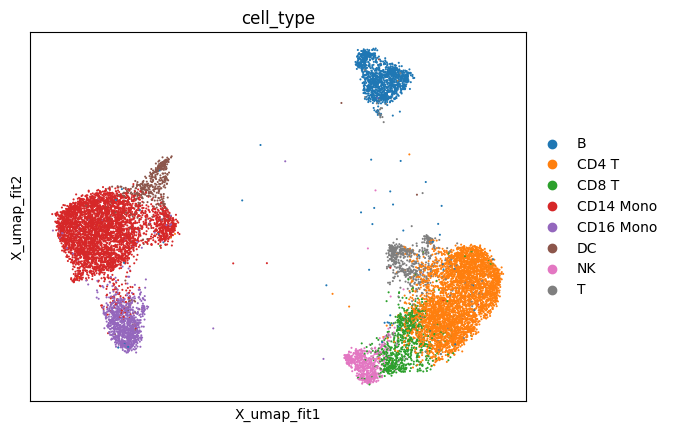

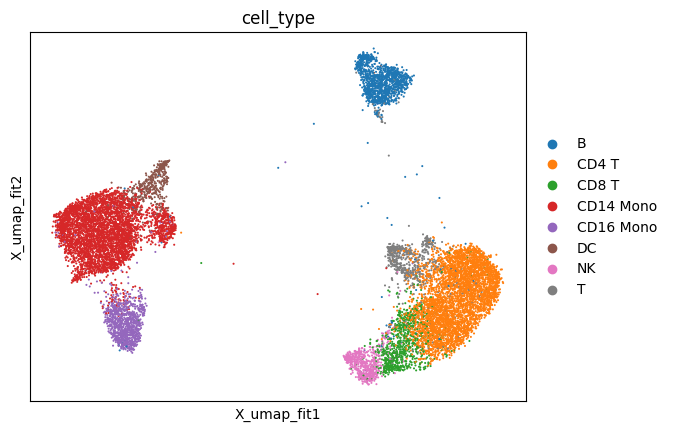

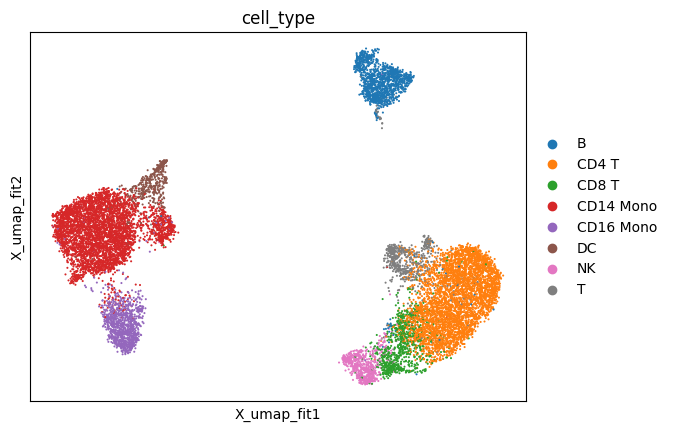

In [9]:
umap_path = f'{save_path}/{covariate_name}'
os.makedirs(umap_path, exist_ok=True)

for level in range(16):
    
    _adata = adata[adata.obs['level'] == level]
    sc.pl.embedding(_adata, basis='X_umap_fit', color=covariate_name, show=False)
    plt.savefig(f'{umap_path}/map_latent_{level}.png', dpi=500, bbox_inches='tight')

# Plot disentangled condition across latent levels

/home/SE/miniconda3/envs/trials/lib/python3.10/site-packages/scanpy/plotting/_utils.py:481: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/home/SE/miniconda3/envs/trials/lib/python3.10/site-packages/scanpy/plotting/_utils.py:481: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/home/SE/miniconda3/envs/trials/lib/python3.10/site-packages/scanpy/plotting/_utils.py:481: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/home/SE/miniconda3/envs/trials/lib/python3.10/site-packages/scanpy/plotting/_utils.py:481: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/home/SE/min

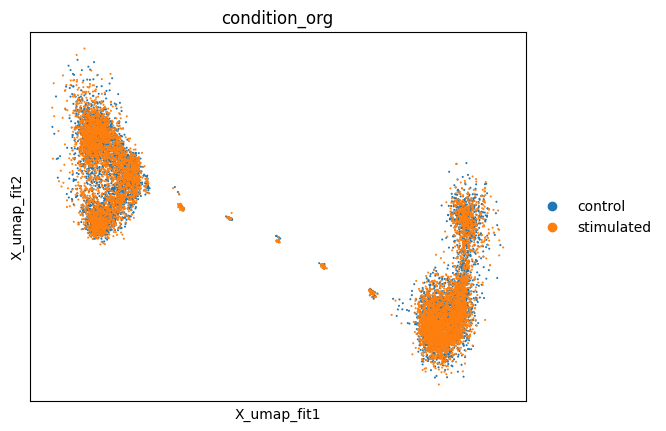

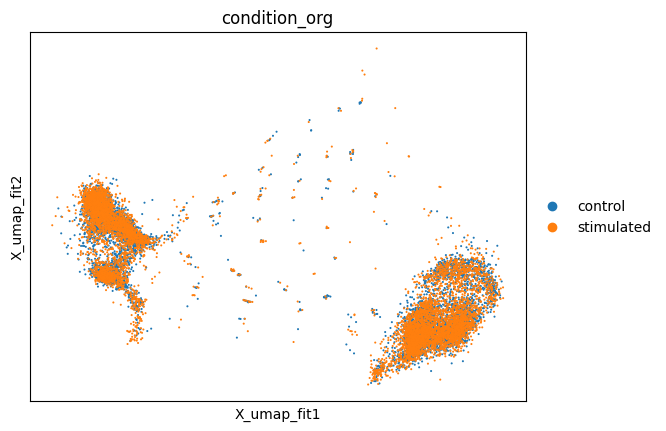

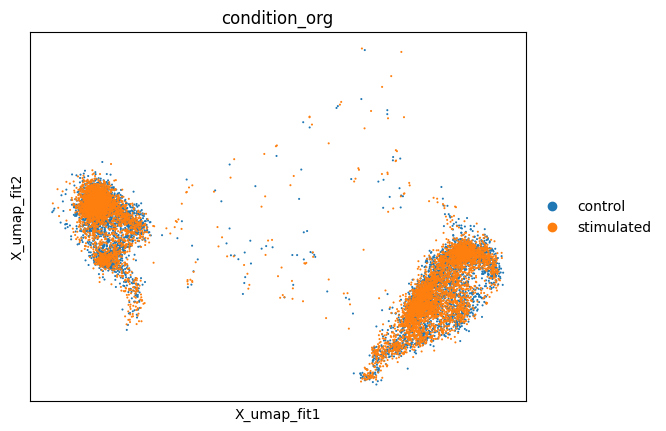

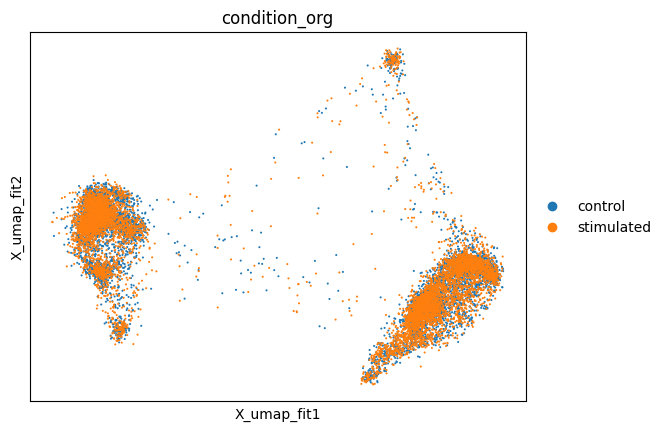

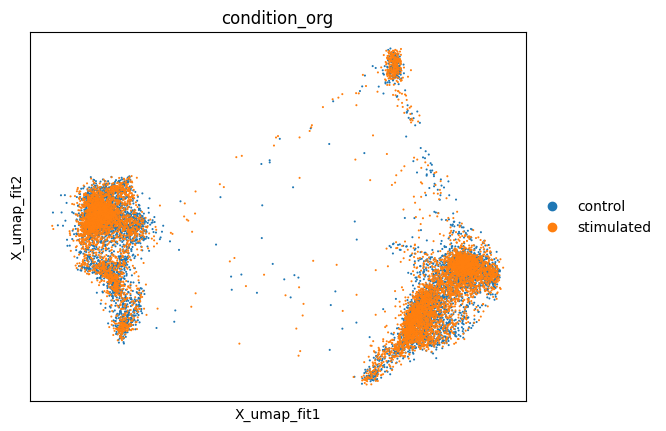

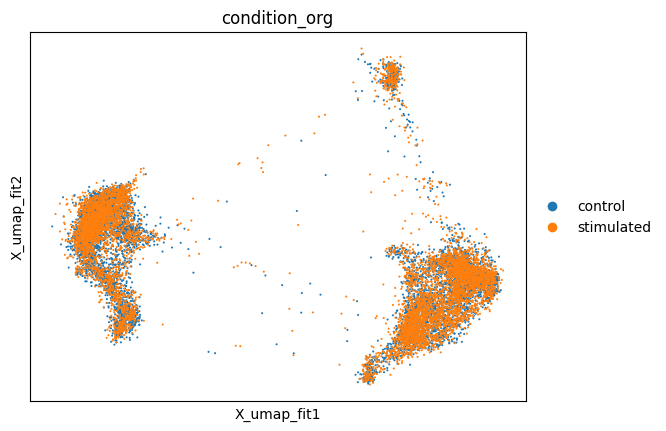

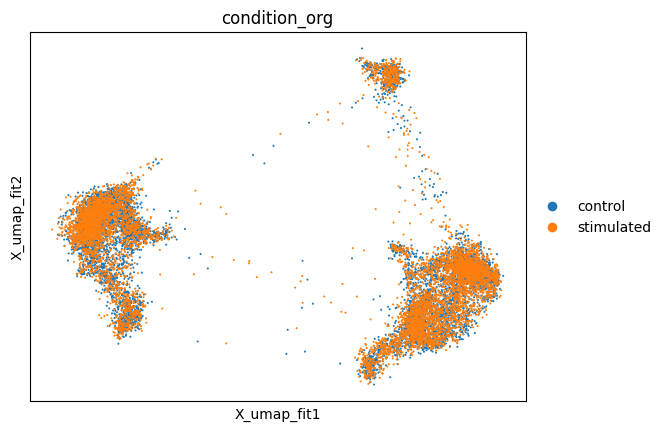

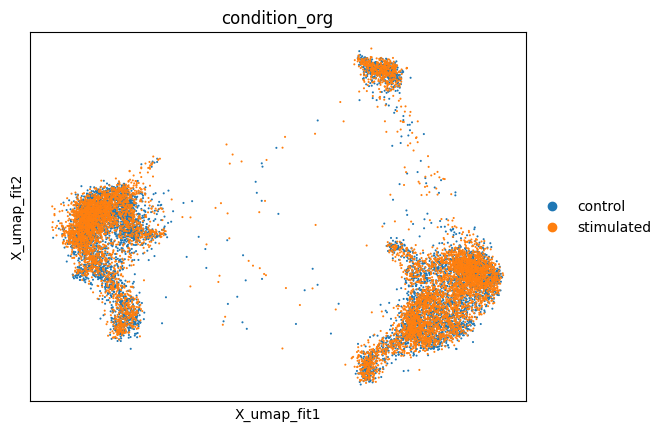

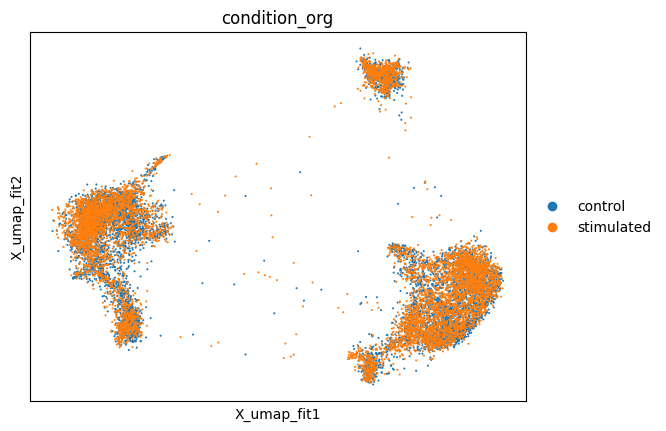

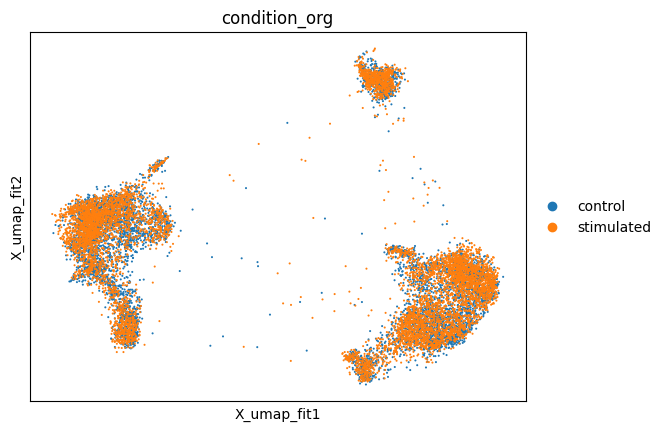

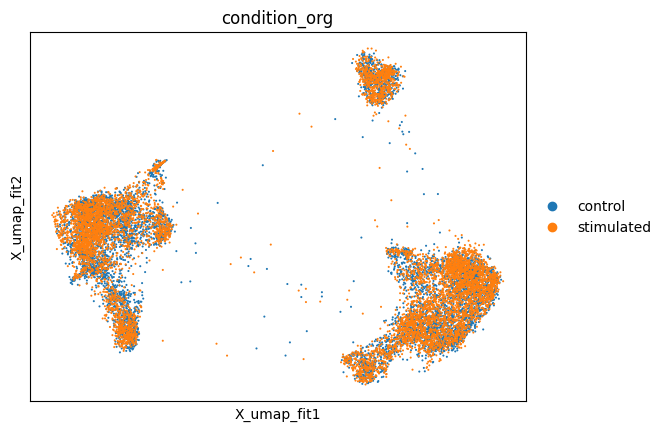

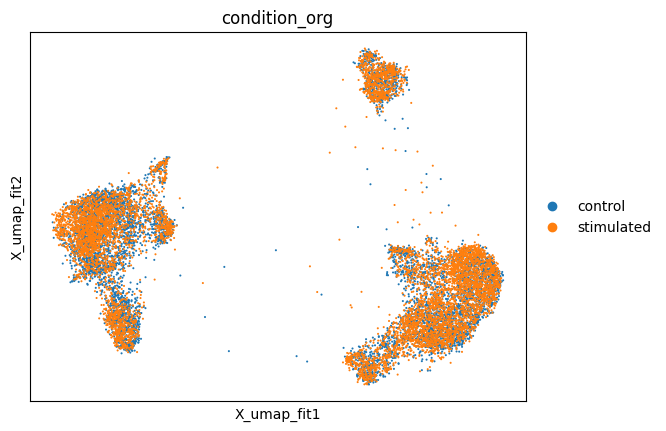

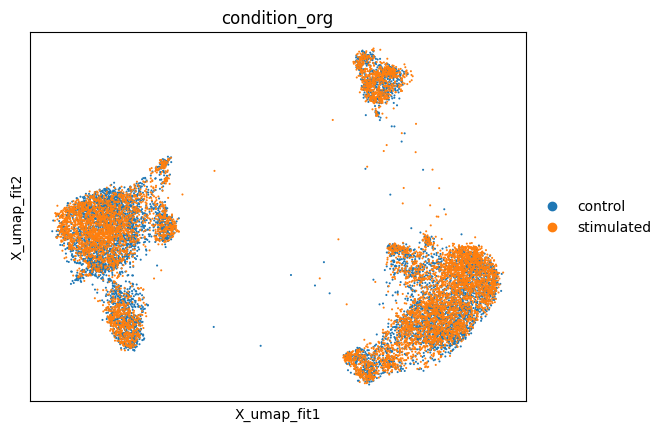

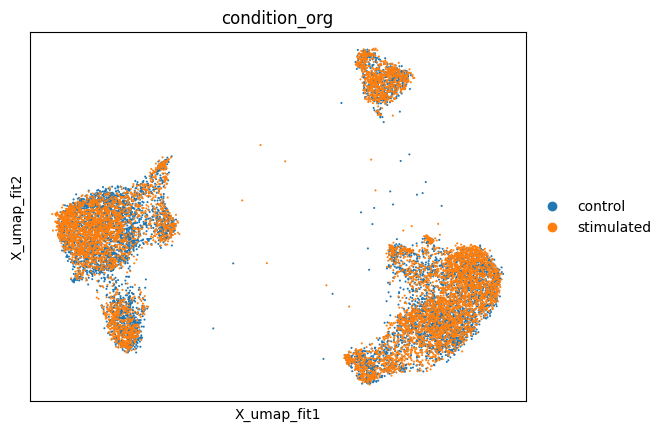

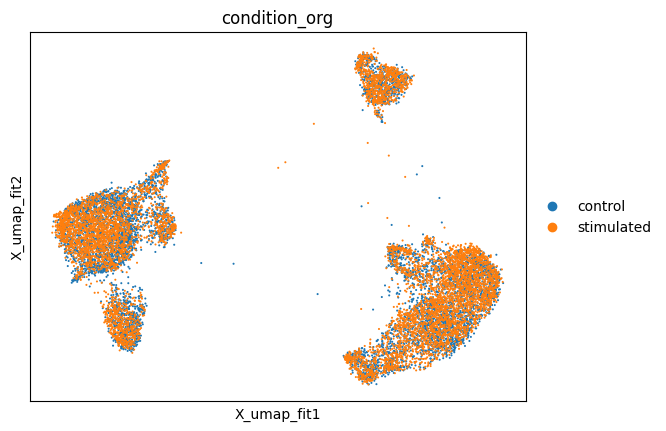

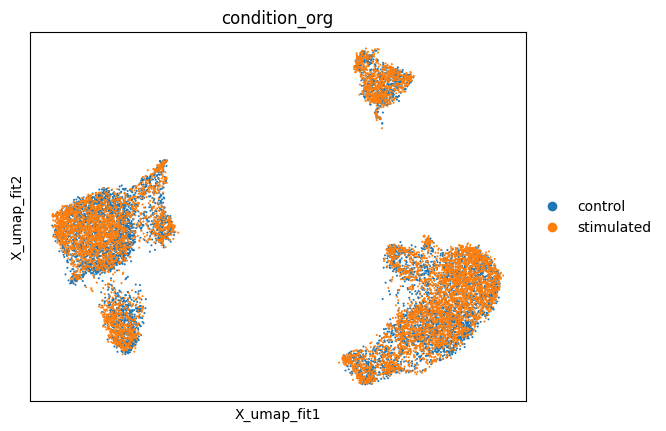

In [10]:
umap_path = f'{save_path}/{condition_name}'
os.makedirs(umap_path, exist_ok=True)

for level in range(16):
    
    _adata = adata[adata.obs['level'] == level]
    sc.pl.embedding(_adata, basis='X_umap_fit', color=f'{condition_name}_org', show=False)
    plt.savefig(f'{umap_path}/map_latent_{level}.png', dpi=500, bbox_inches='tight')